# Images as Data Lab

Welcome to the images as data lab! By the end of this lecture, you will have

1. Combined images to make new images
2. Gained intuition for image template matching
3. Used convolution for feature detection
4. Used max-pooling to downsample images

Let's get started!

## Load Images

In [1]:
from IPython.display import display
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import array_to_img, img_to_array

[X_mnist, y_mnist], _ = mnist.load_data()
X_mnist = np.expand_dims(X_mnist, axis=1).astype(np.float)
imgs = [array_to_img(x).resize(size=[128, 128]) for x in X_mnist]
X = np.array([img_to_array(img) for img in imgs])

Using TensorFlow backend.


#### Consider the Following Two Images...

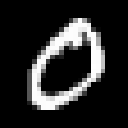

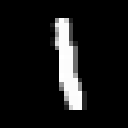

In [2]:
img0, img6 = imgs[1], imgs[6]

display(img0)
display(img6)

### Questions

Before doing anything, what will the resulting image will look like when we...

1. Add them?
2. Subtract them?
    1. Does the order of the subtraction matter? That is, will the resulting image look different depending on the order of the subtraction?
3. Multiply them?

### Tasks

- Compute these images to verify your answer

### Requirements

- Threshold each resulting image so that their minimum value is `0`

### Hints

- Recall how to convert back and forth between numpy arrays and PIL images. You will be doing this often during this lab.

![Converting Images](images/Converting%20Images.png)

#### Consider the following three images...

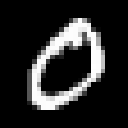

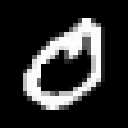

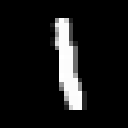

In [3]:
img0, img0_, img1 = imgs[1], imgs[21], imgs[6]

display(img0)
display(img0_)
display(img1)

### Questions

- Will `np.sum(x0*x0_) > np.sum(x0*x1)` or `np.sum(x0*x0_) < np.sum(x0*x1)`? Justify your answer with intuition.

### Tasks

- Compute these quantities to verify your answer

### Questions

- Consider the following keras architecture for classifying MNIST digits

![MNIST Keras](images/MNIST%20Keras.png)
and that we have optimized $\mathbf{W}$ to produce high scores for the correct digit class.

If we take $w_i$ and *reshape it back into a $28 \times 28$ image* and display it, what might it look like? Why might this be the case?

### Tasks

- Define this architecture and train this model for 5 epochs in keras
- Reshape each $w_i$ back to a $28 \times 28$ image and display it

### Hints

- Use a softmax layer + categorical cross entropy loss
- Transform `y` from a `1darray` to a categorical `2darray` with `keras.utils.np_utils.to_categorical()`
    - Use the `28x28` `X_minst` variable as opposed to the `128x128` `X` variable in scope
- Use `keras.layers.Layer.get_weights()` to get the weights of a layer

### Questions

- List two advantages of using a linear classifier for images. List two disadvantages.

- Compare and contrast a logistic regression MNIST classifier and a KNN classifier. When might a KNN classifier outperform linear regression?

## Averaging Images

### Questions

- What do you think the resulting image of averaging all images of `0` would look like? What about the average image for other numbers?

### Tasks

- Compute the average image for every number and display it to verify your answer

### Hints

- Start by just handling `0` and then wrap this logic in a `for` loop to handle the remaining numbers

### Questions

- How do these images compare with the columns of $W$ from the previous section? Do they look similar? Why might this be the case?

# Convolution

Consider the filter $
F =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$
and the image $x =$

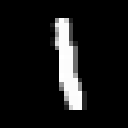

In [4]:
img1

- What will the resuling activation map $x \star F$ look like? What types of patches does $F$ produce the strongest activations for?

### Tasks

- Convolve $w$ with $x$ and display the result

### Hints

- Use `scipy.signal.correlate2d()` with `mode='valid'`
- Since `scipy.signal.correlate2d()` expects a `2darray`, you will have to remove the color dimension from `x` with indexing and then tack it back on to the activation map returned by `scipy.signal.correlate2d()` with `np.expand_dims(axis=0)`

### Questions

- What about the filters
$
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix},
\
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix},
\
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix},
\
\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix},
\
\begin{bmatrix}
0 & 0 & 1 \\
0 & 1 & -1.5 \\
1 & -1.5 & 0
\end{bmatrix},
\
\begin{bmatrix}
1 & -1.5 & 0 \\
0 & 1 & -1.5 \\
0 & 0 & 1
\end{bmatrix}?
$

### Tasks

- Convolve these filters with $x$ and display the resulting activation maps to verify your answer

### Hints

- Write a function that convolves a filter with an image and displays the resulting activation map

## Pooling

We can think of a single convolutional image as a feature detector. For example, in the previous section we considered convolutional filters which produced strong activations for vertical edges. Instead of retaining the entire activation map (i.e. all the features that a single filter produces), we can downsample these activations by performing *max-pooling*.

### Questions

- List two reasons why max-pooling is useful and list two downsides.

### Tasks

- Perform max-pooling on one of the activation maps from the previous section. Try different values `block_size` (e.g. in the range `1-20`)

### Hints

- Use `skimage.measure.block_reduce(..., func=np.max)` for **max**-pooling